# Milestone 02: Exploratory Data Analysis (EDA)
***

In [2]:
#Import Libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('..\..\data\data_raw\*.csv')

Our project focuses on analyzing Steam reviews of various games in a wide range of genres. A contributing factor to the quality of a review may involve the user's length of gaming experience - how many games have they played prior to writing this review?

The more gaming experience a user has, the more likely they are to give a more extensive review on the game as they can compare it to other games they've played to weight the pros and cons.

Below is a visualization of the distribution between the number of users (frequency) and the number of games owned:

In [4]:
frequency = df['num_games_owned'].value_counts()

In [5]:
data = pd.DataFrame({
    'Number of Games Owned': pd.to_numeric(frequency.index),
    'Number of Users': frequency.values
})
data_s = data.sort_values(['Number of Games Owned'])

<AxesSubplot:xlabel='Number of Games Owned', ylabel='Number of Users'>

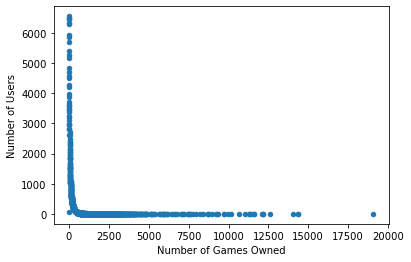

In [6]:
data_s.plot( x='Number of Games Owned', y='Number of Users', kind='scatter')

As we can see, most of our data comes from users that own less than 1000 games - which was kind of expected. Let's view this data again using a table to get the actual values:

In [7]:
data_t = data_s.transpose()
data_t

,501,25,1,3,0,2,4,5,6,7,...,2097,1924,1957,2191,2021,1871,2090,1523,1845,1496
Number of Games Owned,0,1,2,3,4,5,6,7,8,9,...,11568,11607,12110,12138,12172,12599,14041,14329,14341,19072
Number of Users,55,3433,6511,6466,6557,6474,6349,6302,5944,5865,...,1,1,1,1,1,1,1,2,1,2


In [8]:
data_50 = data_s.head(50)
sum_val = data_50.sum()
print("Sum of the first 50 data entries:")
print(sum_val)

Sum of the first 50 data entries:
Number of Games Owned      1225
Number of Users          189030
dtype: int64


In [9]:
sum_val = data_t.sum(axis=1)
print("Overall Sum in the dataset:")
print(sum_val)

Overall Sum in the dataset:
Number of Games Owned    3393759
Number of Users           391332
dtype: int64


In [10]:
max_val = data_t.max(axis=1)
print("Overall Maximum in the dataset:")
print(max_val)

Overall Maximum in the dataset:
Number of Games Owned    19072
Number of Users           6557
dtype: int64


From this quick analysis, we see that highest number of games owned is 19 072 and the lowest is 0. Also note that most reviews came from people that owned 1 to 5 games (at least 6000 users each), with the highest being 4 Steam games. And as we see from the tables and calculations above, those owning 50 or less games account for almost half of all the reviews in our data.

One interesting point to note is that there are 55 game reviews that came from reviewers that don't own any Steam games, which brings us to wonder: did they obtain the game from a different source other than Steam or did they review the game without even playing it yet?

Much like the amount of gaming experience, the amount of playtime is also an important contributing factor. Some may leave a review after 5-10 minutes of playing and others might review after a week of playing. This will effect the content of the review as those that have a short playtime may leave biased or inaccurate reviews as it's mostly based on first impressions of the game. Meanwhile, those that have a longer playtime not only review based on first impressions, but they also have some experience to comment on other aspects as well.

In [1]:
playtime = df['playtime_at_review'].value_counts()

NameError: name 'df' is not defined

In [12]:
data_p = pd.DataFrame({
    'Play Time in Minutes': pd.to_numeric(playtime.index),
    'Number of Users': playtime.values
})
data_ps = data_p.sort_values(['Play Time in Minutes'])

<AxesSubplot:xlabel='Play Time in Minutes', ylabel='Number of Users'>

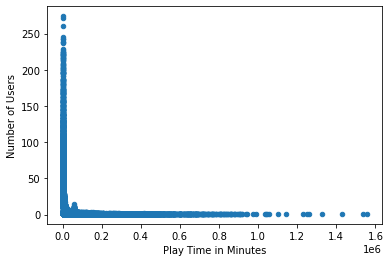

In [13]:
data_ps.plot( x='Play Time in Minutes', y='Number of Users', kind='scatter')

Once again, let's use a table to see the actual values of this data:

In [22]:
data_ptrans = data_ps.transpose()
data_ptrans

,11742,57976,64117,14150,45479,12474,42873,11809,118,20666,...,38432,42063,37203,47433,48832,52392,39024,58590,32559,36176
Play Time in Minutes,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,1053350.0,1102577.0,1144066.0,1229270.0,1249496.0,1257989.0,1328794.0,1426669.0,1536702.0,1556556.0
Number of Users,6.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,157.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
data_p50 = data_ps.head(50)
sum_val = data_p50.sum()
print("Sum of the first 50 data entries:")
print(sum_val)

Sum of the first 50 data entries:
Play Time in Minutes     670.0
Number of Users         2978.0
dtype: float64


In [20]:
sum_val = data_ptrans.sum(axis=1)
print("Overall Sum in the dataset:")
print(sum_val)

Overall Sum in the dataset:
Play Time in Minutes    3.802863e+09
Number of Users         3.912560e+05
dtype: float64


In [21]:
max_val = data_ptrans.max(axis=1)
print("Overall Maximum in the dataset:")
print(max_val)

Overall Maximum in the dataset:
Play Time in Minutes    1556556.0
Number of Users             274.0
dtype: float64


In [23]:
data_ps.loc[data_ps['Number of Users'] == 274.0]

,Play Time in Minutes,Number of Users
0,181.0,274


What I found very interesting to see in this analysis was there were, in fact, some people that wrote a review after less than 5 minutes of playing! Luckily, the reviews with less than an hour of playtime account for a very small percentage of all the reviews in our dataset. 

From our calculations above, we see that our highest number of reviews come from users that played for 181 minutes (or roughly 3 hours), which I think is an appropriate amount of playtime to write an accurate or "more valid" review that I would take into consideration when I decided whether to buy a game or not. 

In [49]:
data_ps120 = data_ps.head(221)
data_pstrans120 = data_ps120.transpose()
data_pstrans120

,11742,57976,64117,14150,45479,12474,42873,11809,118,20666,...,710,27512,50400,724,813,22983,28471,567,61632,615
Play Time in Minutes,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,116.0,116.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0,120.0
Number of Users,6.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,157.0,3.0,...,80.0,2.0,1.0,79.0,74.0,2.0,2.0,91.0,1.0,88.0


In [50]:
sum_val = data_pstrans120.sum(axis=1)
print("Sum of data with less than 2hrs of playtime:")
print(sum_val)

Sum of data with less than 2hrs of playtime:
Play Time in Minutes    13264.0
Number of Users         11559.0
dtype: float64


I personally believe that game reviews with less than an hour of playtime are not very accurate reviews, so it was good to see that those reviews contributed to less than 3% of our data. 

This data will help us have a better understanding of our research results as it allows us to somewhat "predict" what the content of the reviews will like: short playtime might result in short reviews due to lack of in-game experience or more overall gaming experience may result in more longer, critical reviews as they have more games they can compare it to. Although this "prediction" may not be accurate, this data is interesting to see the correlation between review content and gaming experience/playtime. 